# import required packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load the Dataset

In [21]:
data = pd.read_csv("C:/Users/deepa/Downloads/Housing.csv")

In [23]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [27]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [29]:
data.shape

(545, 13)

## Data cleaning

In [32]:
data.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
data.isnull().sum()*100/data.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

## Data visualizations

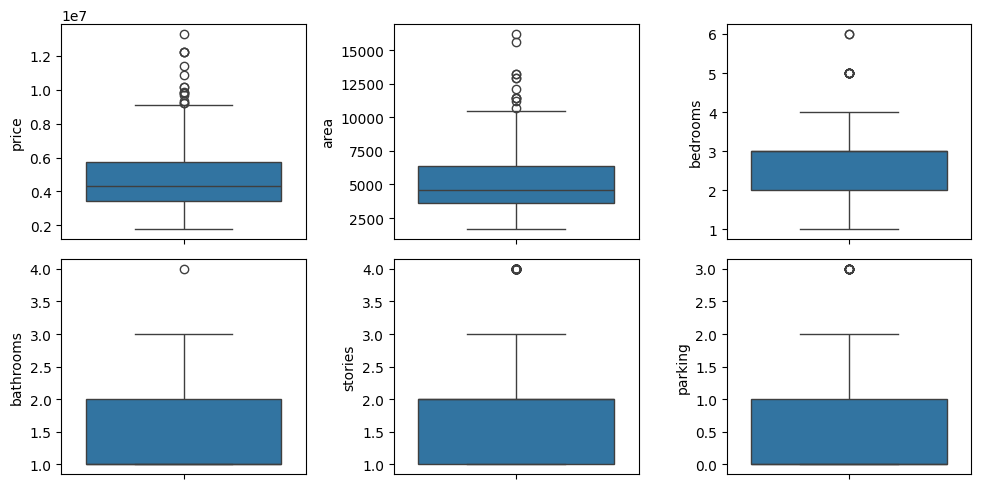

In [130]:
import seaborn as sns
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

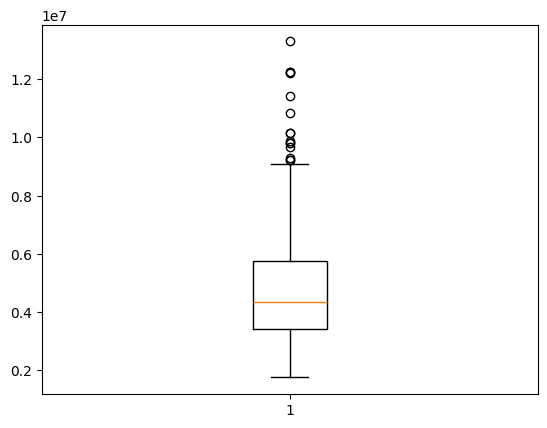

In [37]:
# outlier treatment for price
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

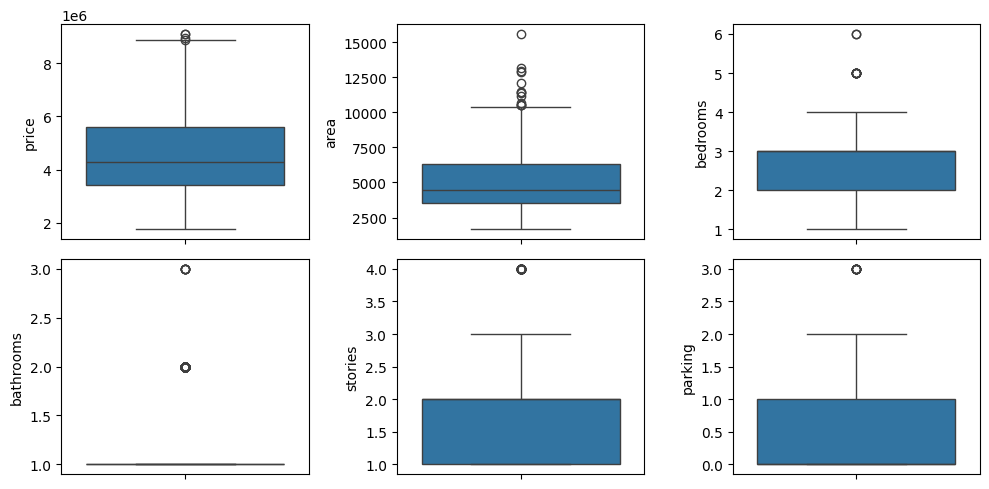

In [38]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

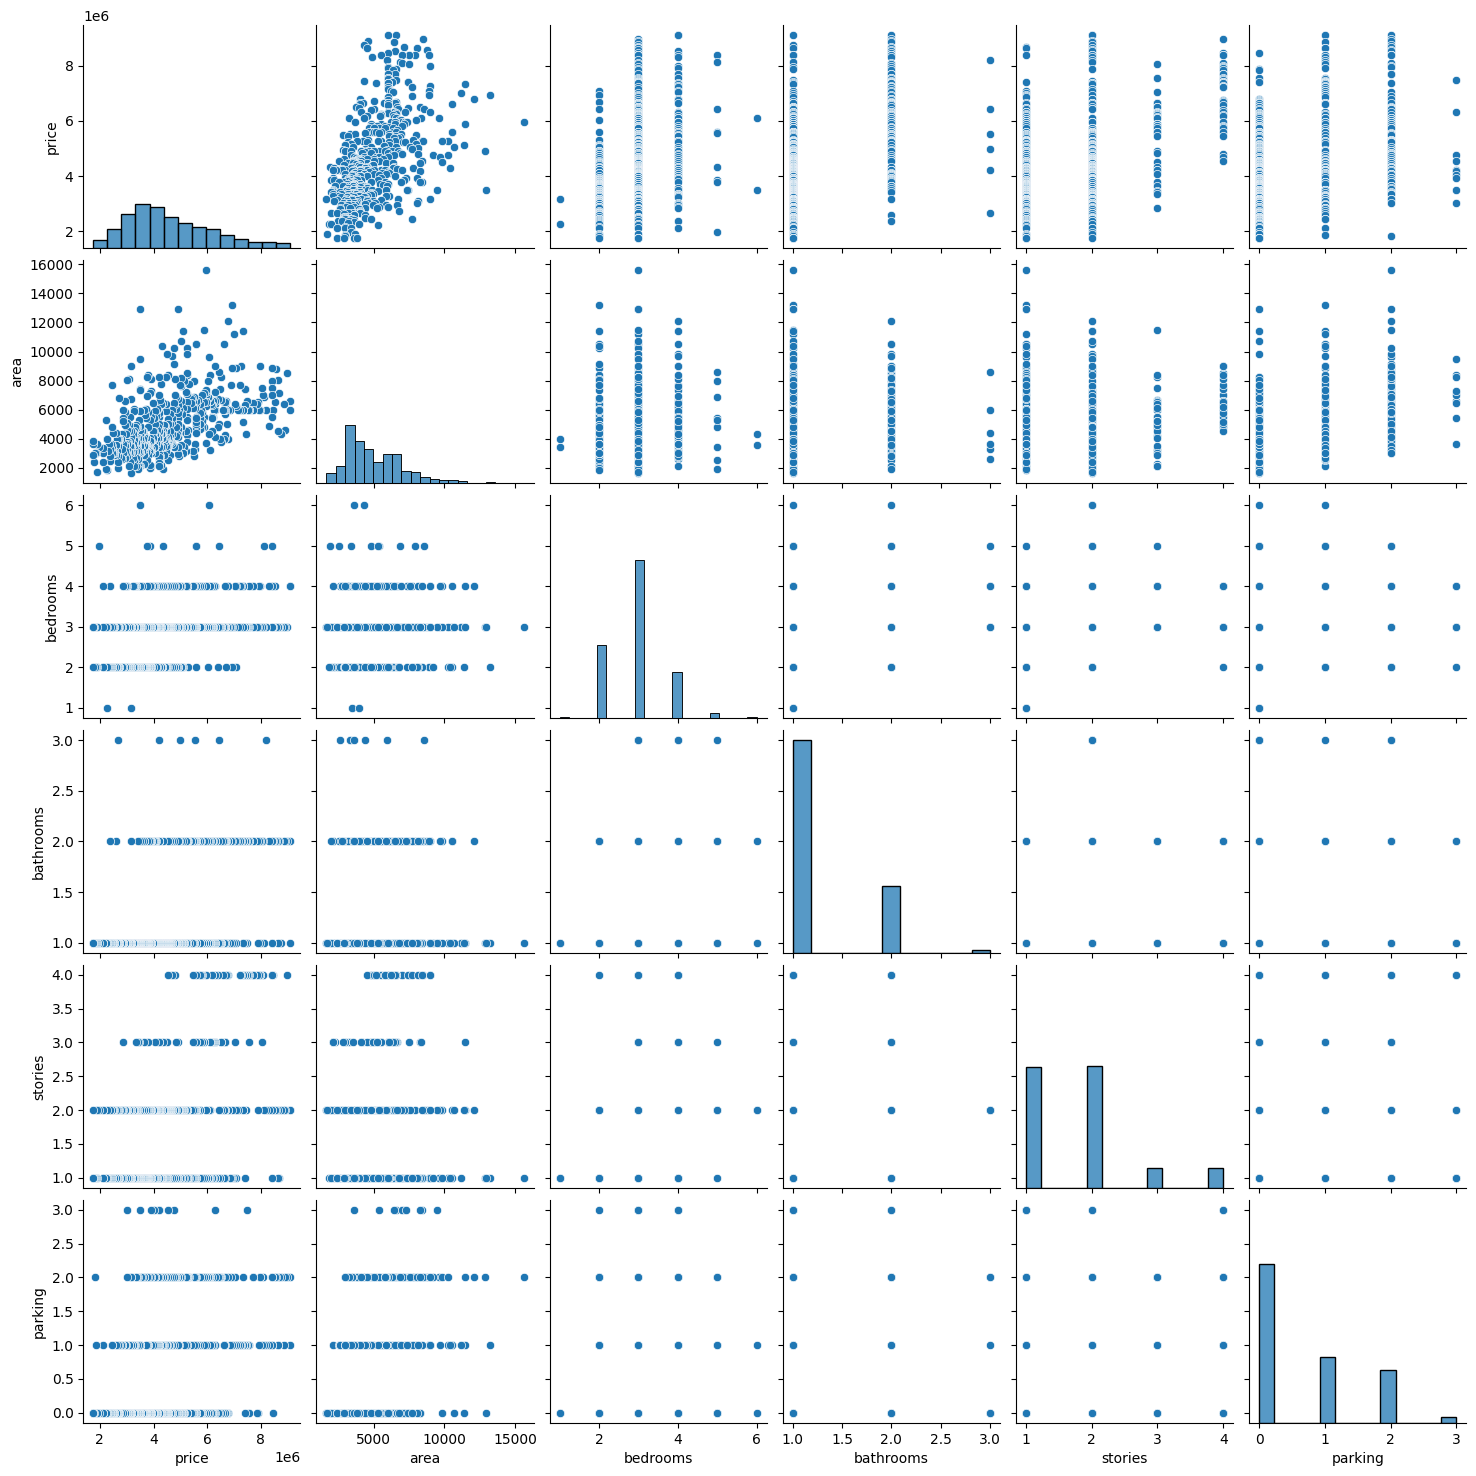

In [41]:
sns.pairplot(data)
plt.show()

C:\Users\deepa\AppData\Local\Temp\ipykernel_7748\1695229330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mainroad', y='price', data=data, palette="Set2")
C:\Users\deepa\AppData\Local\Temp\ipykernel_7748\1695229330.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='guestroom', y='price', data=data, palette="Set2")
C:\Users\deepa\AppData\Local\Temp\ipykernel_7748\1695229330.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='basement', y='price', data=data, palette="Set2")
C:\Users\deepa\AppData\Local\Temp\ipykernel_7748\1695

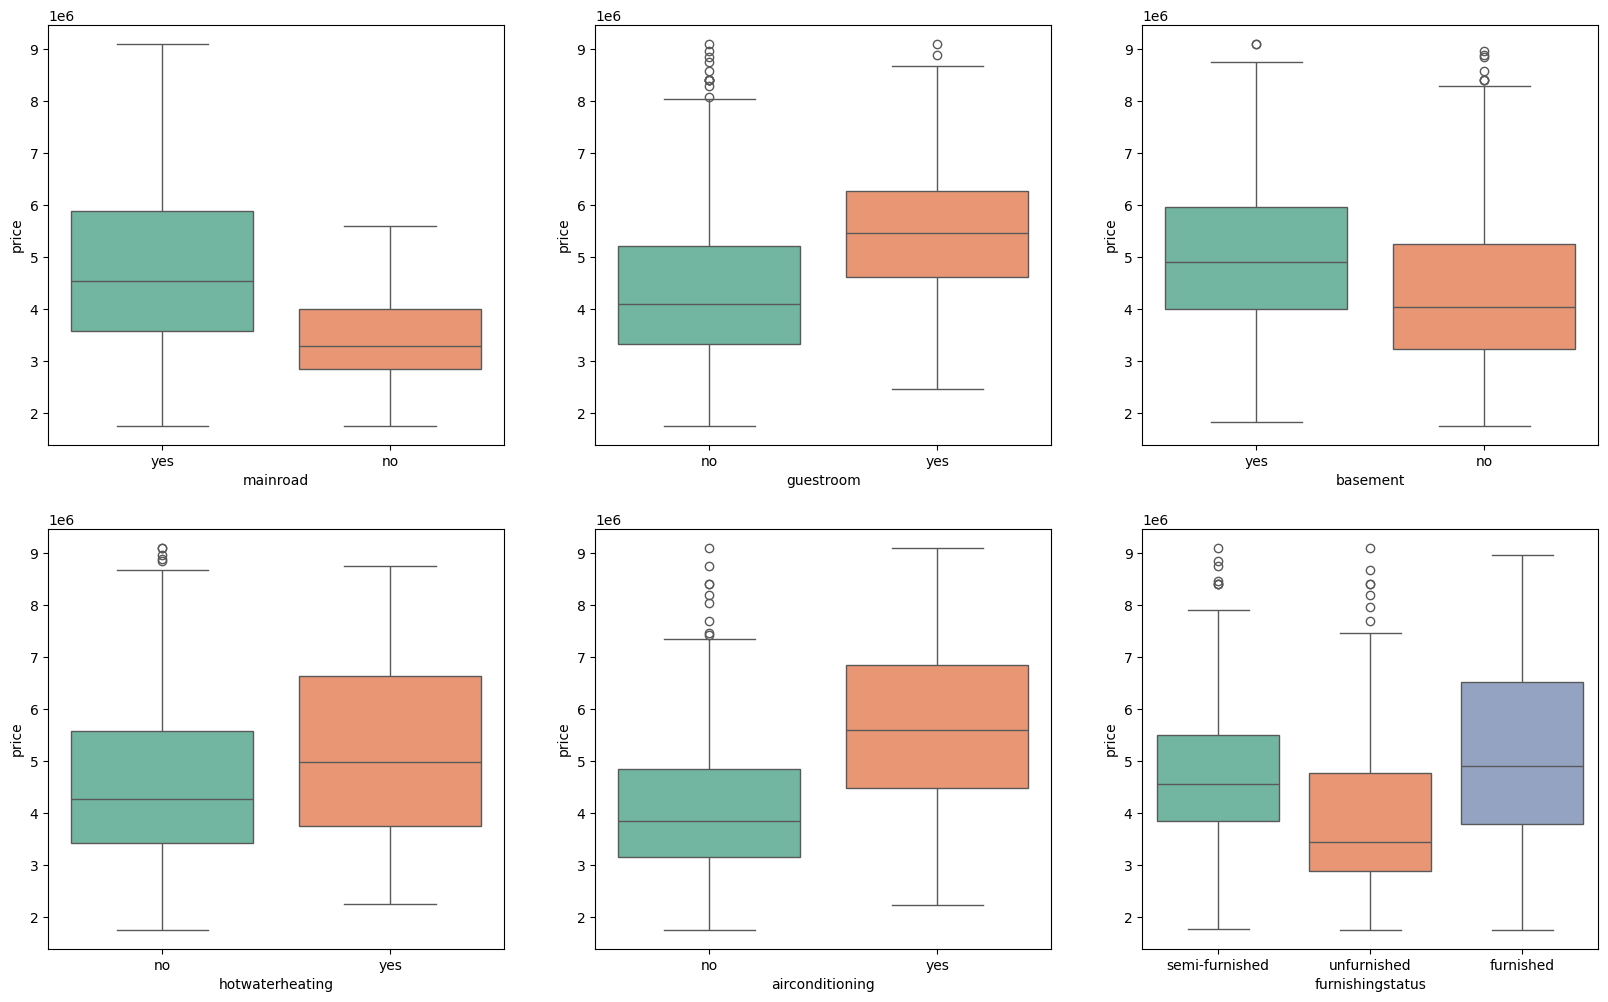

In [42]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x='mainroad', y='price', data=data, palette="Set2")

plt.subplot(2, 3, 2)
sns.boxplot(x='guestroom', y='price', data=data, palette="Set2")

plt.subplot(2, 3, 3)
sns.boxplot(x='basement', y='price', data=data, palette="Set2")

plt.subplot(2, 3, 4)
sns.boxplot(x='hotwaterheating', y='price', data=data, palette="Set2")

plt.subplot(2, 3, 5)
sns.boxplot(x='airconditioning', y='price', data=data, palette="Set2")

plt.subplot(2, 3, 6)
sns.boxplot(x='furnishingstatus', y='price', data=data, palette="Set2")

plt.show()


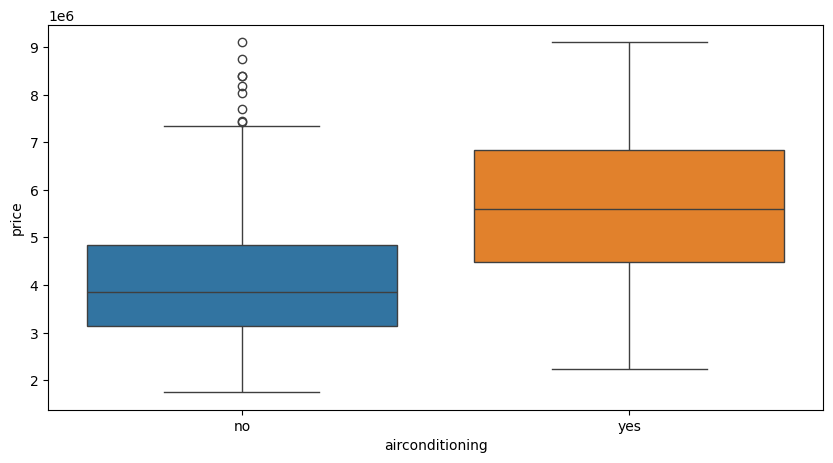

In [44]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'airconditioning', y = 'price', hue = 'airconditioning', data = data)
plt.show()

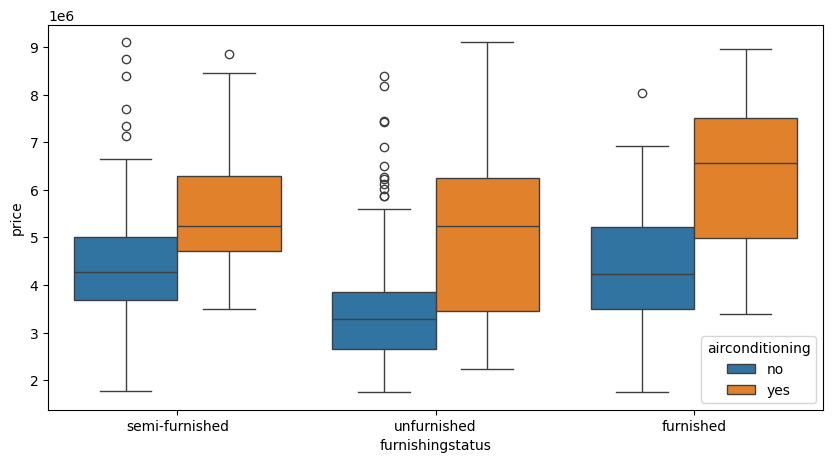

In [45]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data)
plt.show()

## Splitting the Dataset into Training and Testing Sets

In [46]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
48,0.776190,0.189964,0.4,0.5,0.333333,yes,no,yes,no,no,0.333333,no,unfurnished
465,0.176190,0.154122,0.2,0.0,0.000000,yes,no,no,no,no,0.000000,no,unfurnished
144,0.523810,0.218638,0.6,0.0,0.333333,yes,yes,yes,no,yes,0.333333,no,furnished
395,0.238095,0.139785,1.0,0.0,0.333333,yes,no,no,no,no,0.333333,no,unfurnished
254,0.371429,0.205018,0.6,0.0,0.333333,yes,no,no,no,yes,0.666667,no,semi-furnished


In [51]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.386021,0.241122,0.389757,0.125337,0.261456,0.219227
std,0.212167,0.143626,0.144831,0.226142,0.277672,0.282378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238095,0.136559,0.400000,0.000000,0.000000,0.000000
50%,0.342857,0.204301,0.400000,0.000000,0.333333,0.000000
75%,0.523810,0.327957,0.400000,0.000000,0.333333,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df_train.corr

<bound method DataFrame.corr of         price      area  bedrooms  bathrooms   stories mainroad guestroom  \
48   0.776190  0.189964       0.4        0.5  0.333333      yes        no   
465  0.176190  0.154122       0.2        0.0  0.000000      yes        no   
144  0.523810  0.218638       0.6        0.0  0.333333      yes       yes   
395  0.238095  0.139785       1.0        0.0  0.333333      yes        no   
254  0.371429  0.205018       0.6        0.0  0.333333      yes        no   
..        ...       ...       ...        ...       ...      ...       ...   
295  0.333333  0.048387       0.4        0.0  0.333333       no        no   
68   0.695238  0.311828       0.4        0.0  0.000000      yes        no   
365  0.265714  0.272401       0.2        0.0  0.000000      yes        no   
94   0.619048  0.311828       0.6        0.5  1.000000      yes        no   
535  0.047619  0.122581       0.2        0.0  0.000000      yes        no   

    basement hotwaterheating airconditionin

In [63]:
# Create a sample dataset
data =pd.read_csv("C:/Users/deepa/Downloads/Housing.csv")

df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [69]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Select Features and Target Variable

In [97]:
X = df[['area', 'parking']]  
y = df['price']  


In [99]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Evaluate the Model

In [107]:
# Calculate Mean Squared Error and R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.00
R-squared: 1.00


## Visualize the Results

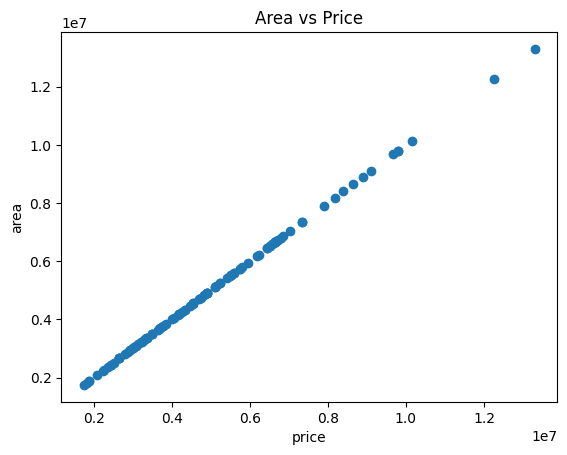

In [138]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('price')
plt.ylabel('area')
plt.title('Area vs Price')
plt.show()


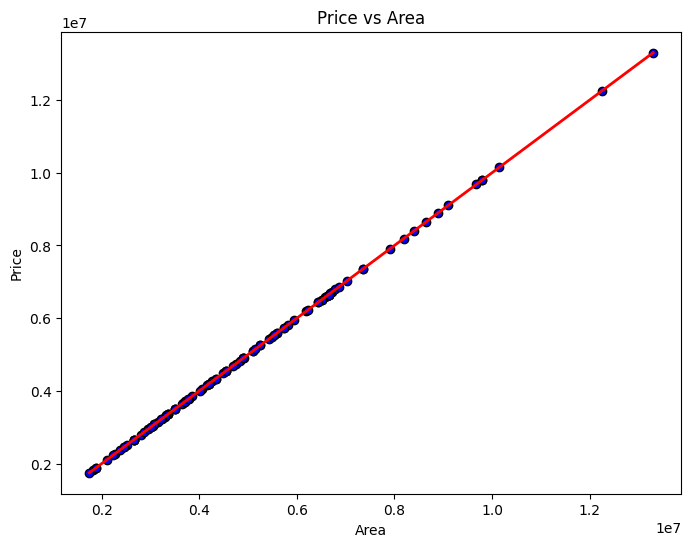

In [140]:
# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect prediction
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()


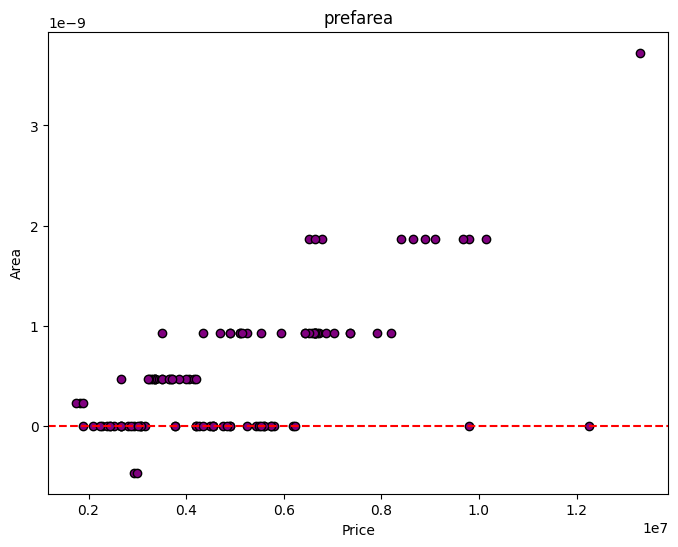

In [142]:
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('prefarea')
plt.show()
